In [4]:
import tensorflow as tf
import os

2024-07-15 19:22:29.988986: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 19:22:30.110813: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-15 19:22:30.221939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-15 19:22:30.315243: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-15 19:22:30.341542: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-15 19:22:30.516769: I tensorflow/core/platform/cpu_feature_gu

In [5]:
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

I0000 00:00:1721085753.328485    6477 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-15 19:22:33.330468: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [1]:
import cv2
import imghdr

/tmp/ipykernel_6477/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data'
os.listdir(data_dir)
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
image_exts[2]

'bmp'

In [8]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}' .format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issues with image {}' .format(image_path))

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 254 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

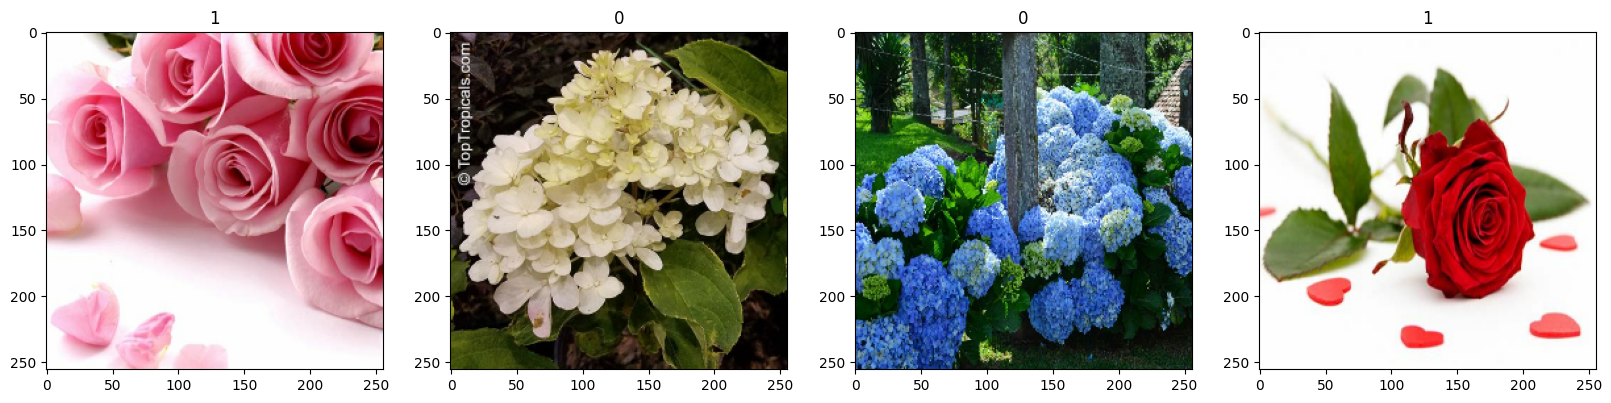

In [13]:
fig, ax = plt.subplots(ncols = 4, figsize  = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
# 1 = rose         0 = hydrangea

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
sci = data.as_numpy_iterator()
batch = sci.next()

In [17]:
batch[0].min()
batch[0].max()

1.0

In [18]:
len(data)

8

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [22]:
train_size + val_size + test_size

8

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [24]:
len(test)

1

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/home/roysomak4/project/pyenv/ai/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 16)   │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,692,001 (14.08 MB)

 Trainable params: 3,692,001 (14.08 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
logdir = 'logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 372ms/step - accuracy: 0.5124 - loss: 1.3589 - val_accuracy: 0.6406 - val_loss: 0.7308
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.7477 - loss: 0.5651 - val_accuracy: 0.7344 - val_loss: 0.5688
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 349ms/step - accuracy: 0.7490 - loss: 0.4730 - val_accuracy: 0.8438 - val_loss: 0.3660
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 380ms/step - accuracy: 0.7641 - loss: 0.4752 - val_accuracy: 0.8281 - val_loss: 0.4094
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 354ms/step - accuracy: 0.8136 - loss: 0.4247 - val_accuracy: 0.8125 - val_loss: 0.3713
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 355ms/step - accuracy: 0.7850 - loss: 0.3950 - val_accuracy: 0.8594 - val_loss: 0.2764
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 351ms/step - accuracy: 0.7792 - loss: 0.3998 - val_accuracy: 0.9062 - val_loss: 0.2752
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - accuracy: 0.8593 - loss: 0.3294 - val_accuracy: 0.8281 - val_loss:

In [71]:
hist.history

{'accuracy': [0.53515625,
  0.51953125,
  0.59765625,
  0.5703125,
  0.6171875,
  0.64453125,
  0.703125,
  0.71484375,
  0.70703125,
  0.71484375,
  0.7734375,
  0.828125,
  0.81640625,
  0.8359375,
  0.8515625,
  0.8828125,
  0.8984375,
  0.89453125,
  0.921875,
  0.9296875],
 'loss': [2.058366298675537,
  0.6745418310165405,
  0.644579291343689,
  0.6553977131843567,
  0.6372019648551941,
  0.6339439153671265,
  0.5929623246192932,
  0.5650536417961121,
  0.5590862035751343,
  0.5294360518455505,
  0.5021355748176575,
  0.436018168926239,
  0.4463881850242615,
  0.407687246799469,
  0.35344651341438293,
  0.30598336458206177,
  0.2677885591983795,
  0.27680644392967224,
  0.21174894273281097,
  0.18392729759216309],
 'val_accuracy': [0.359375,
  0.5625,
  0.53125,
  0.640625,
  0.578125,
  0.671875,
  0.6875,
  0.734375,
  0.796875,
  0.765625,
  0.8125,
  0.828125,
  0.90625,
  0.859375,
  0.859375,
  0.984375,
  0.828125,
  0.921875,
  0.9375,
  0.953125],
 'val_loss': [0.70702552

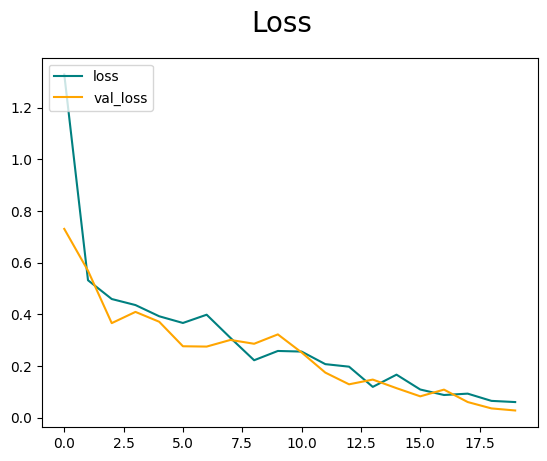

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

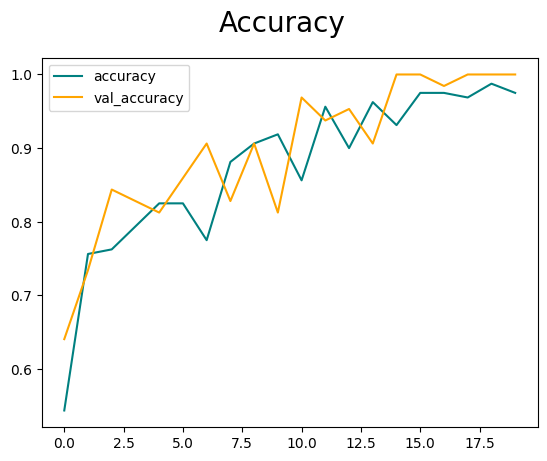

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


2024-07-15 19:25:31.399619: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


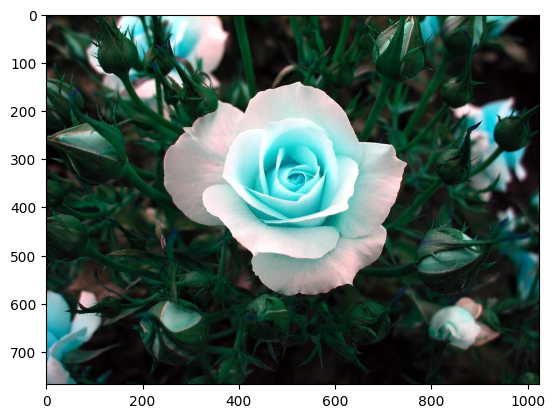

In [44]:
img = cv2.imread('data/rose_test.jpeg')
plt.imshow(img)
plt.show()

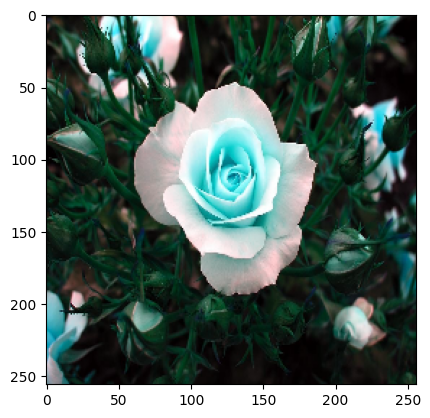

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [47]:
yhat

array([[0.00748799]], dtype=float32)

In [48]:
if yhat > 0.5:
    print(f'Predicted class is Hydrangea')
else:
    print(f'Predicted class is Rose')

Predicted class is Rose


In [49]:
from tensorflow.keras.models import load_model

In [50]:
model.save(os.path.join('models', 'rose_hydrangea_model.h5'))

In [52]:
new_model = load_model(os.path.join('models', 'rose_hydrangea_model.h5'))

In [53]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [54]:
if yhatnew > 0.5:
    print(f'Predicted class is Hydrangea')
else:
    print(f'Predicted class is Rose')

Predicted class is Rose
